In [1]:
import pandas as pd

# Carico il dataset
file_path = 'df_final.csv'
data = pd.read_csv(file_path)

In [2]:
# Attributi selezionati per l'analisi
columns_of_interest = ['duration_ms', 'acousticness', 'instrumentalness', 'valence', 'danceability',
                       'energy', 'n_beats', 'popularity', 'liveness', 'tempo', 'speechiness',
                       'genre']

# Estraggo solo le colonne di interesse
selected_data = data[columns_of_interest]

# Discretizzo gli attributi continui
# Utilizzo il metodo qcut di pandas per dividere i dati in quartili
# Per attributi con un numero limitato di valori unici, uso il metodo cut
for col in ['duration_ms', 'acousticness', 'instrumentalness', 'valence', 'danceability',
            'energy', 'n_beats', 'popularity', 'liveness', 'tempo', 'speechiness']:
    selected_data[col] = pd.qcut(selected_data[col], 3, labels=["bassa", "media", "alta"])

# Gli attributi 'genre' e 'time_signature' sono già categorici, quindi li lascio come sono

# Visualizzo il risultato della discretizzazione
selected_data.head()


<ipython-input-2-e4a4b9c4f1e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = pd.qcut(selected_data[col], 3, labels=["bassa", "media", "alta"])
<ipython-input-2-e4a4b9c4f1e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = pd.qcut(selected_data[col], 3, labels=["bassa", "media", "alta"])
<ipython-input-2-e4a4b9c4f1e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,duration_ms,acousticness,instrumentalness,valence,danceability,energy,n_beats,popularity,liveness,tempo,speechiness,genre
0,media,media,alta,alta,alta,bassa,alta,alta,alta,alta,alta,j-dance
1,alta,media,alta,bassa,bassa,bassa,alta,bassa,alta,bassa,alta,iranian
2,alta,bassa,alta,media,bassa,alta,alta,bassa,alta,media,bassa,black-metal
3,alta,media,media,media,media,media,alta,media,media,alta,alta,bluegrass
4,alta,bassa,media,alta,media,media,alta,media,alta,alta,media,happy


In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Ricarico il dataset dato che lo stato del codice è stato reimpostato
file_path = 'df_final.csv'
data = pd.read_csv(file_path)

# Attributi selezionati per l'analisi
columns_of_interest = ['duration_ms', 'acousticness', 'instrumentalness', 'valence', 'danceability',
                       'energy', 'n_beats', 'popularity', 'liveness', 'tempo', 'speechiness',
                        'genre']

# Estraggo solo le colonne di interesse
selected_data = data[columns_of_interest]

# Discretizzo gli attributi continui
for col in ['duration_ms', 'acousticness', 'instrumentalness', 'valence', 'danceability',
            'energy', 'n_beats', 'popularity', 'liveness', 'tempo', 'speechiness']:
    selected_data[col] = pd.qcut(selected_data[col], 3, labels=["bassa", "media", "alta"], duplicates='drop')

# Convertiamo il DataFrame in una lista di liste, dove ogni lista rappresenta una transazione
transactions = selected_data.apply(lambda x: [f"{col}_{x[col]}" for col in columns_of_interest], axis=1).tolist()

# Utilizzo di TransactionEncoder per trasformare i dati in formato binario
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)
df_encoded = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

# Visualizzo il dataframe trasformato
df_encoded.head()


<ipython-input-3-734655530a32>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = pd.qcut(selected_data[col], 3, labels=["bassa", "media", "alta"], duplicates='drop')
<ipython-input-3-734655530a32>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = pd.qcut(selected_data[col], 3, labels=["bassa", "media", "alta"], duplicates='drop')
<ipython-input-3-734655530a32>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,acousticness_alta,acousticness_bassa,acousticness_media,danceability_alta,danceability_bassa,danceability_media,duration_ms_alta,duration_ms_bassa,duration_ms_media,energy_alta,...,popularity_media,speechiness_alta,speechiness_bassa,speechiness_media,tempo_alta,tempo_bassa,tempo_media,valence_alta,valence_bassa,valence_media
0,False,False,True,True,False,False,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,True,False,True,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,False,True,False,False,True,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,True
3,False,False,True,False,False,True,True,False,False,False,...,True,True,False,False,True,False,False,False,False,True
4,False,True,False,False,False,True,True,False,False,False,...,True,False,False,True,True,False,False,True,False,False


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Carica il dataset
file_path = 'df_final.csv'  # Assicurati che il percorso del file sia corretto
data = pd.read_csv(file_path)

# Codice per la preparazione dei dati (come hai già implementato)

# Applicazione dell'algoritmo Apriori con diverse soglie di supporto
support_thresholds = [0.01, 0.02, 0.05, 0.1, 0.2]  # Esempi di soglie di supporto
for threshold in support_thresholds:
    frequent_itemsets = apriori(df_encoded, min_support=threshold, use_colnames=True)
    print(f"Soglia di Supporto: {threshold}")
    print(f"Numero di Item Sets Frequenti: {len(frequent_itemsets)}")
    print(frequent_itemsets.head())

    # Generazione delle regole di associazione (opzionale a questo punto)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    print("Regole di Associazione:")
    print(rules.head())

    print("\n")  # Stampa una riga vuota per separare i risultati


Soglia di Supporto: 0.01
Numero di Item Sets Frequenti: 34545
    support              itemsets
0  0.333149   (acousticness_alta)
1  0.333564  (acousticness_bassa)
2  0.333287  (acousticness_media)
3  0.333287   (danceability_alta)
4  0.334188  (danceability_bassa)
Regole di Associazione:
           antecedents          consequents  antecedent support  \
0  (acousticness_alta)       (energy_bassa)            0.333149   
1       (energy_bassa)  (acousticness_alta)            0.333703   
2    (genre_bluegrass)  (acousticness_alta)            0.050145   
3       (genre_disney)  (acousticness_alta)            0.049522   
4       (genre_indian)  (acousticness_alta)            0.049591   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.333703  0.232719    0.698545  2.093314  0.121547    2.210269   
1            0.333149  0.232719    0.697385  2.093314  0.121547    2.203628   
2            0.333149  0.034007    0.678177  2.035658  0.017302    2.0

In [5]:
from mlxtend.frequent_patterns import apriori, association_rules

# Applicazione dell'algoritmo Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Visualizzazione degli item sets frequenti
print(f"Numero di Item Sets Frequenti: {len(frequent_itemsets)}")
print(frequent_itemsets.head())

# Generazione delle regole di associazione
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Visualizzazione delle regole di associazione
print("Regole di Associazione:")
print(rules.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Numero di Item Sets Frequenti: 1390
    support              itemsets
0  0.333149   (acousticness_alta)
1  0.333564  (acousticness_bassa)
2  0.333287  (acousticness_media)
3  0.333287   (danceability_alta)
4  0.334188  (danceability_bassa)
Regole di Associazione:
            antecedents          consequents  antecedent support  \
0   (acousticness_alta)       (energy_bassa)            0.333149   
1        (energy_bassa)  (acousticness_alta)            0.333703   
2   (acousticness_alta)      (n_beats_bassa)            0.333149   
3       (n_beats_bassa)  (acousticness_alta)            0.334811   
4  (acousticness_bassa)        (energy_alta)            0.333564   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.333703  0.232719    0.698545  2.093314  0.121547    2.210269   
1            0.333149  0.232719    0.697385  2.093314  0.121547    2.203628   
2            0.334811  0.168444    0.505613  1.510146  0.056903    1.345483   
3          

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

# Modifica la massima dimensione degli itemset desiderata
max_len = 4  # Per esplorare triplette

# Applicazione dell'algoritmo Apriori con la nuova massima dimensione
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True, max_len=max_len)

# Visualizzazione degli item sets frequenti
print(f"Numero di Item Sets Frequenti: {len(frequent_itemsets)}")
print(frequent_itemsets.head())

# Generazione delle regole di associazione
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Visualizzazione delle regole di associazione
print("Regole di Associazione con Itemset di Dimensione", max_len)
print(rules.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Numero di Item Sets Frequenti: 1387
    support              itemsets
0  0.333149   (acousticness_alta)
1  0.333564  (acousticness_bassa)
2  0.333287  (acousticness_media)
3  0.333287   (danceability_alta)
4  0.334188  (danceability_bassa)
Regole di Associazione con Itemset di Dimensione 4
            antecedents          consequents  antecedent support  \
0   (acousticness_alta)       (energy_bassa)            0.333149   
1        (energy_bassa)  (acousticness_alta)            0.333703   
2   (acousticness_alta)      (n_beats_bassa)            0.333149   
3       (n_beats_bassa)  (acousticness_alta)            0.334811   
4  (acousticness_bassa)        (energy_alta)            0.333564   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.333703  0.232719    0.698545  2.093314  0.121547    2.210269   
1            0.333149  0.232719    0.697385  2.093314  0.121547    2.203628   
2            0.334811  0.168444    0.505613  1.510146  0.056903

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


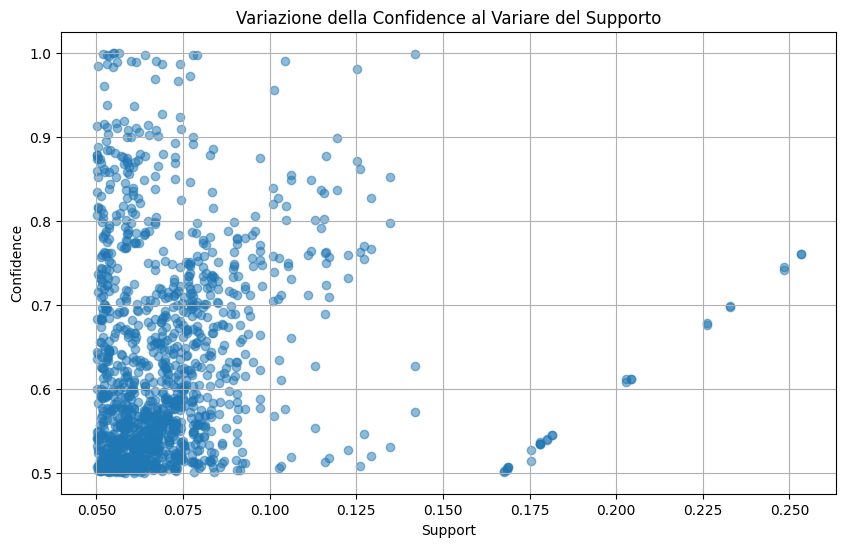

In [7]:
import matplotlib.pyplot as plt

# Estrai support e confidence dalle regole di associazione
support = rules['support']
confidence = rules['confidence']

# Crea il grafico a dispersione per la confidence e il support
plt.figure(figsize=(10, 6))
plt.scatter(support, confidence, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Variazione della Confidence al Variare del Supporto')
plt.grid(True)
plt.show()
